In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from models.EchoStateNetwork import EchoStateNetwork
from reservoirpy.nodes import Reservoir, Ridge, Input

In [3]:
loaded_dataset = np.load("./out/pca_features_dataset.npz")

X_dataset = loaded_dataset["X_dataset"]
Y_dataset = loaded_dataset["Y_dataset"]

print(X_dataset.shape)
print(Y_dataset.shape)

(353, 1814, 53)
(353,)


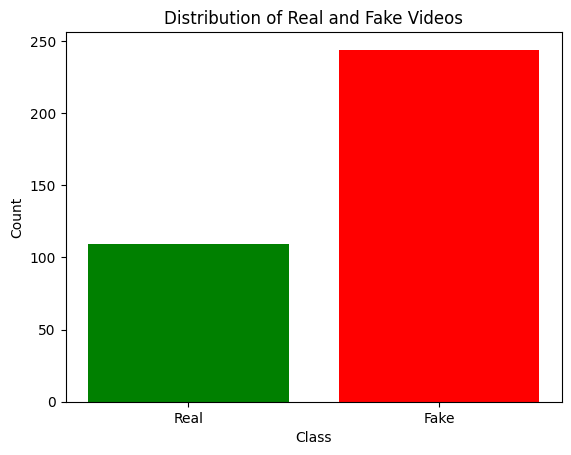

In [4]:
labels, counts = np.unique(Y_dataset, return_counts=True)
plt.bar(labels, counts, color=['green', 'red'], tick_label=['Real', 'Fake'])
plt.title("Distribution of Real and Fake Videos")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

/var/folders/7t/tn7d7_7x0294gvz7svhdqz480000gn/T/ipykernel_58351/2432350583.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([real_pca_mean.flatten(), fake_pca_mean.flatten()], labels=["Real", "Fake"])


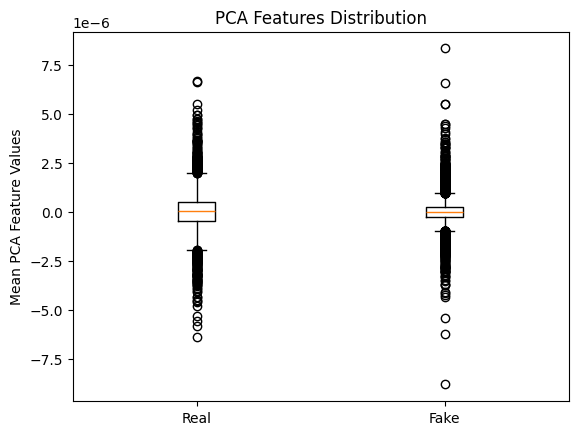

In [5]:
# PCA features aggregation
pca_features = X_dataset[:, :, :50]  # Extract PCA features
real_videos = X_dataset[Y_dataset == 0, :, :50]
fake_videos = X_dataset[Y_dataset == 1, :, :50]

# Mean of PCA features per video
real_pca_mean = real_videos.mean(axis=1)
fake_pca_mean = fake_videos.mean(axis=1)

# Boxplot comparison
plt.boxplot([real_pca_mean.flatten(), fake_pca_mean.flatten()], labels=["Real", "Fake"])
plt.title("PCA Features Distribution")
plt.ylabel("Mean PCA Feature Values")
plt.show()


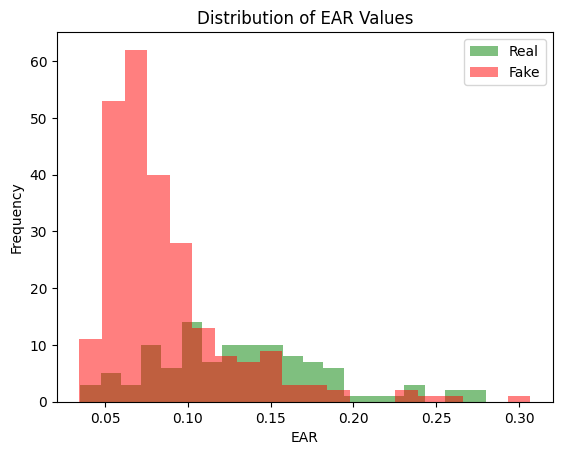

In [13]:
ear_real = X_dataset[Y_dataset == 0, :, 50].mean(axis=1)
ear_fake = X_dataset[Y_dataset == 1, :, 50].mean(axis=1)

plt.hist(ear_real, bins=20, alpha=0.5, label="Real", color="green")
plt.hist(ear_fake, bins=20, alpha=0.5, label="Fake", color="red")
plt.title("Distribution of EAR Values")
plt.xlabel("EAR")
plt.ylabel("Frequency")
plt.legend()
plt.show()

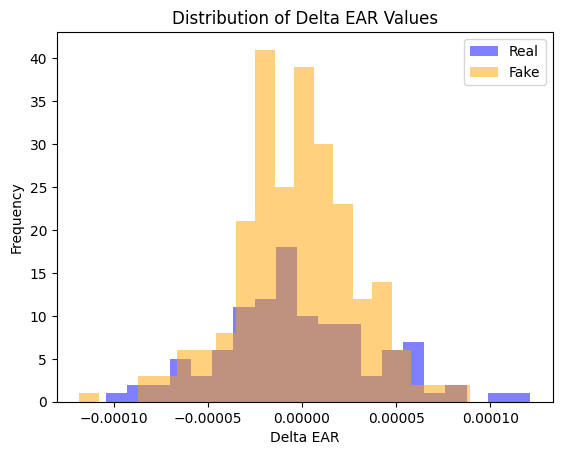

In [17]:
delta_ear_real = X_dataset[Y_dataset == 0, :, 51].mean(axis=1)
delta_ear_fake = X_dataset[Y_dataset == 1, :, 51].mean(axis=1)

plt.hist(delta_ear_real, bins=20, alpha=0.5, label="Real", color="blue")
plt.hist(delta_ear_fake, bins=20, alpha=0.5, label="Fake", color="orange")
plt.title("Distribution of Delta EAR Values")
plt.xlabel("Delta EAR")
plt.ylabel("Frequency")
plt.legend()
plt.show()

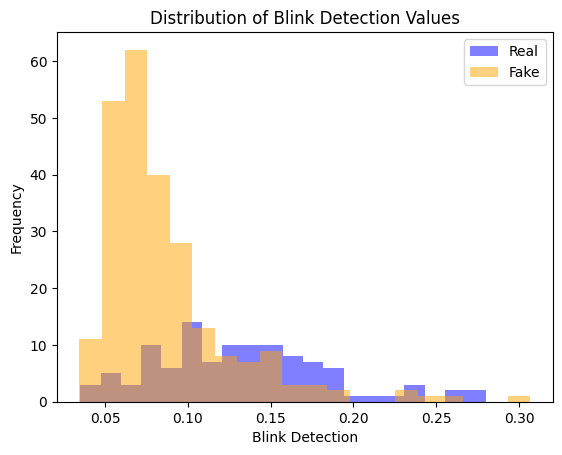

In [11]:
# Blink detection feature (index 53)
blink_real = X_dataset[Y_dataset == 0, :, 52].mean(axis=1)
blink_fake = X_dataset[Y_dataset == 1, :, 52].mean(axis=1)

plt.hist(blink_real, bins=20, alpha=0.5, label="Real", color="blue")
plt.hist(blink_fake, bins=20, alpha=0.5, label="Fake", color="orange")
plt.title("Distribution of Blink Detection Values")
plt.xlabel("Blink Detection")
plt.ylabel("Frequency")
plt.legend()
plt.show()


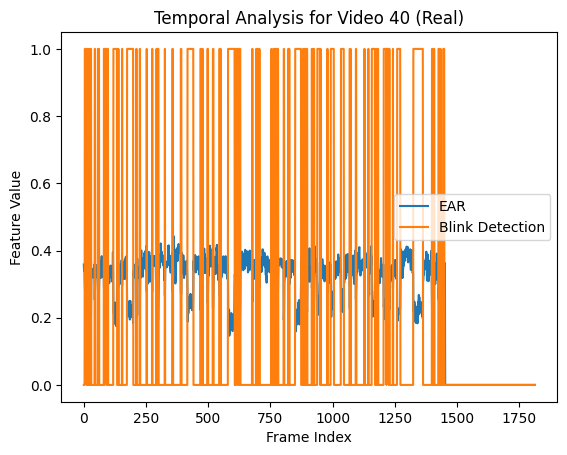

In [16]:
video_index = 40
ear_values = X_dataset[video_index, :, 50]
blink_values = X_dataset[video_index, :, 52]

plt.plot(ear_values, label="EAR")
plt.plot(blink_values, label="Blink Detection")
plt.title(f"Temporal Analysis for Video {video_index} ({'Real' if Y_dataset[video_index] == 0 else 'Fake'})")
plt.xlabel("Frame Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()

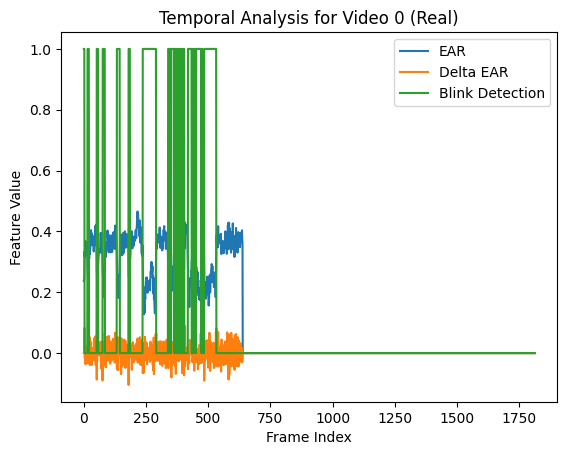

In [18]:
video_index = 0  # Select a video index
ear_values = X_dataset[video_index, :, 50]
delta_ear_values = X_dataset[video_index, :, 51]
blink_values = X_dataset[video_index, :, 52]

plt.plot(ear_values, label="EAR")
plt.plot(delta_ear_values, label="Delta EAR")
plt.plot(blink_values, label="Blink Detection")
plt.title(f"Temporal Analysis for Video {video_index} ({'Real' if Y_dataset[video_index] == 0 else 'Fake'})")
plt.xlabel("Frame Index")
plt.ylabel("Feature Value")
plt.legend()
plt.show()


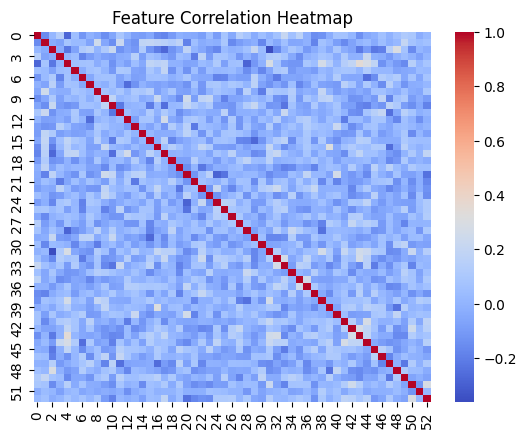

In [19]:
import seaborn as sns

# Aggregate features across all frames for all videos
features_mean = X_dataset.mean(axis=1)  # Shape: (353, 53)

# Correlation matrix
correlation_matrix = np.corrcoef(features_mean, rowvar=False)

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


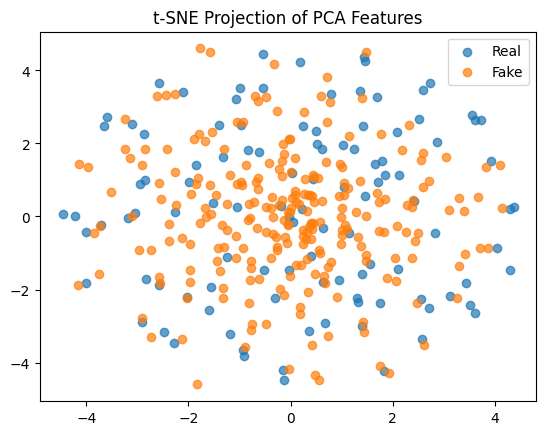

In [23]:
from sklearn.manifold import TSNE

# Aggregate PCA features across frames
pca_features_mean = X_dataset[:, :, :49].mean(axis=1)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_features_mean)

plt.scatter(tsne_results[Y_dataset == 0, 0], tsne_results[Y_dataset == 0, 1], label="Real", alpha=0.7)
plt.scatter(tsne_results[Y_dataset == 1, 0], tsne_results[Y_dataset == 1, 1], label="Fake", alpha=0.7)
plt.legend()
plt.title("t-SNE Projection of PCA Features")
plt.show()
